### Why?
The purpose of this project is to explore some techniques in supervised learning. It is important to realize that understanding an algorithm or technique requires understanding how it behaves under a variety of circumstances. As such, you will be asked to "implement" some simple learning algorithms (for sufficiently small values of implement, meaning I don't really want you to implement anything at all), and to compare their performance.
### The Means
In this assignment you will go through the process of exploring your chosen datasets, tuning the algorithms you learned about, and writing a thorough analysis of your findings. All that matters is the analysis. It doesn't matter if you implement any learning algorithms yourself (you probably shouldn't) as long as you participate in this journey of exploring, tuning, and analyzing. Concretely, this means you may program in any language that you wish, and you are allowed to use any library you wish as long as it was not written specifically to solve this assignment, and as long as a TA can recreate your experiments on a standard linux machine if necessary (we know how to install a pip package). You might want to look at scikit-learn or Weka, for example. 
Some examples of acceptable libraries:
* Machine learning algorithms: scikit-learn (python), Weka (java), e107/nnet/random forest(R), ML toolbox (matlab), tensorflow/pytorch (python)
* Scientific computing: numpy/scipy(python), Matlab, R
* Plotting: matplotlib (python), seaborn (python), Matlab, R
You can use other libraries as long as they fulfill the conditions above. If you are unsure, ask a TA (but please use common sense first)! There is no trick here for you to overthink. Again, the key issue is that I don't care that you implement any of the learning algorithms below; however, I care very much about your analysis. 

### The Problems Given to You
You should implement five learning algorithms. They are:
* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors

Each algorithm is described in detail in your textbook, the handouts, and all over the web. In fact, instead of implementing the algorithms yourself, you may (and by may I mean should) use software packages that you find elsewhere; however, if you do so you should provide proper attribution. Also, you will note that you have to do some fiddling to get good results, graphs and such, so even if you use another's package, you may need to be able to modify it in various ways.
Decision Trees. For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.
Neural Networks. For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.
Boosting. Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.
Support Vector Machines. You should implement (for sufficiently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.
k-Nearest Neighbors. You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.
Testing. In addition to implementing (wink) the algorithms described above, you should design two interesting classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples. I don't care where you get the data. You can download some, take some from your own research, or make some up on your own. Be careful about the data you choose, though. You'll have to explain why they are interesting, use them in later assignments, and come to really care about them.

### What to Turn In
You must submit:
1. a file named README.txt containing instructions for running your code (see note below)
2. a file named yourgtaccount-analysis.pdf containing your writeup
Note below: if the data are way, way, too huge for submitting, see if you can arrange for an URL. This also goes for code, too. Submitting all of Weka isn't necessary, for example, because I can get it myself; however, you should at least submit any files you found necessary to change and enough support and explanation so we could reproduce your results if we really wanted to do so. In any case, include all the information in README.txt
The file yourgtaccount-analysis.pdf should contain:
* a description of your classification problems, and why you feel that they are interesting. Think hard about this. To be at all interesting the problems should be non-trivial on the one hand, but capable of admitting comparisons and analysis of the various algorithms on the other. 
* the training and testing error rates you obtained running the various learning algorithms on your problems. At the very least you should include graphs that show performance on both training and test data as a function of training size (note that this implies that you need to design a classification problem that has more than a trivial amount of data) and--for the algorithms that are iterative--training times/iterations. Both of these kinds of graphs are referred to as learning curves, BTW.
* analyses of your results. Why did you get the results you did? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How fast were they in terms of wall clock time? Iterations? Would cross validation help (and if it would, why didn't you implement it?)? How much performance was due to the problems you chose? How about the values you choose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose? Please do look at more than one. And please make sure you understand it, it only counts if the results are meaningful)? Which algorithm performed best? How do you define best? Be creative and think of as many questions you can, and as many answers as you can.
For the sanity of your graders, please keep your analysis as short as possible while still covering the requirements of the assignment: to facilitate this sanity, analysis writeup is limited to 12 pages.


## IDEAS
- https://www.kaggle.com/wendykan/lending-club-loan-data --> target: loan grade

- https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding --> likelihood to be funded (target: % funded)

https://www.kaggle.com/openfoodfacts/world-food-facts#en.openfoodfacts.org.products.tsv
https://www.kaggle.com/noriuk/us-education-datasets-unification-project#enroll_states.csv


In [5]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

## Decision trees with some form of pruning
- multi-class classification
- mention curse of dimensionality (feature reduction)
- all categorical features, so need to encode
- ccp_alpha for pruning, tested and updated to 0.017
- cross validation default = 5


Choose this dataset as a warmup dataset to get used to working with categorical data

In [253]:
mushroom_df = pd.read_csv('data/mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [254]:
feature_cols = mushroom_df.columns.drop('habitat')
feature_df = pd.get_dummies(mushroom_df[feature_cols])

In [255]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, mushroom_df['habitat'], test_size=0.20, random_state=42)

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

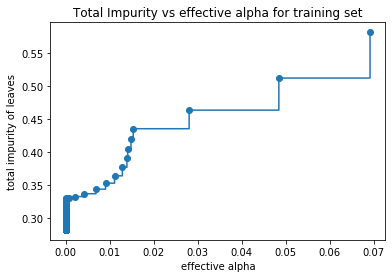

In [256]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [257]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08283911681667155


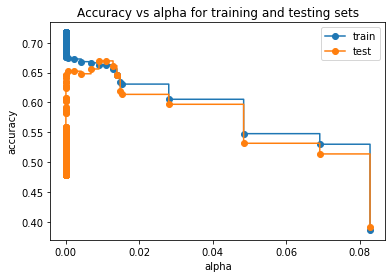

In [258]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Feature Importances

In [259]:
feature_importances = dict(zip(feature_df.columns, tree_clf.feature_importances_))
top_fifteen = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)[:15]

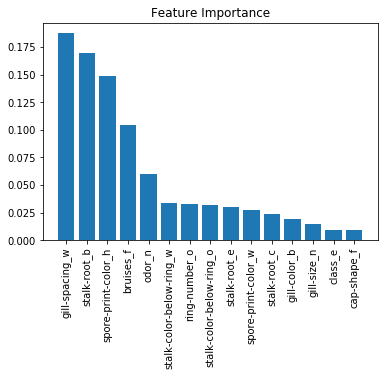

In [260]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(len(top_fifteen)), [f[1] for f in top_fifteen])
plt.xticks(range(len(top_fifteen)), [f[0] for f in top_fifteen], rotation=90)
plt.show()

In [261]:
top_ten_feats = [f[0] for f in top_fifteen][:12]
# mention curse of dimensionality
tree_clf_2 = tree.DecisionTreeClassifier(ccp_alpha=0.017)
tree_clf_2 = tree_clf.fit(X_train[top_ten_feats], y_train)

y_pred = tree_clf_2.predict(X_test[top_ten_feats])

In [262]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=tree_clf_2.classes_))

              precision    recall  f1-score   support

           d       0.74      0.81      0.77       635
           g       0.76      0.67      0.71       433
           l       0.40      1.00      0.57       153
           m       0.00      0.00      0.00        58
           p       0.55      0.13      0.20       239
           u       0.59      0.60      0.59        80
           w       1.00      1.00      1.00        27

    accuracy                           0.65      1625
   macro avg       0.58      0.60      0.55      1625
weighted avg       0.65      0.65      0.62      1625



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


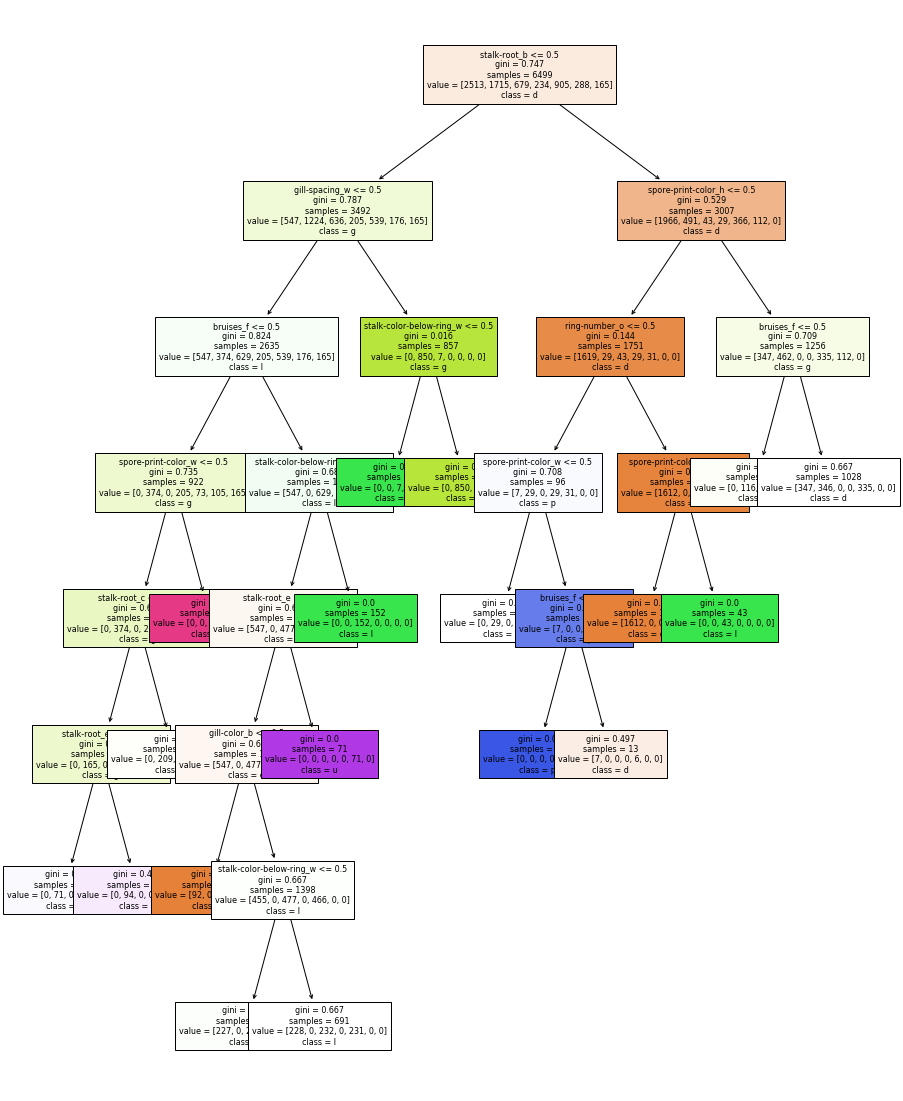

In [285]:
fig, ax = plt.subplots(figsize=(15, 20))
tree.plot_tree(tree_clf_2, ax=ax, feature_names=top_ten_feats, class_names=tree_clf_2.classes_ , fontsize=8, filled=True)
plt.show()

## Neural networks
* 1-2 hidden layers
* hyperparameters need to do model complexity analysis
* 

In [6]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [8]:
kiva_df = pd.read_csv('data/kiva_loans.csv')

In [9]:
kiva_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [10]:
# get excluded when trying to determine time to fully fund
kiva_df[kiva_df.funded_amount != kiva_df.loan_amount].count()

id                    48330
funded_amount         48330
loan_amount           48330
activity              48330
sector                48330
use                   47642
country_code          48330
country               48330
region                40277
currency              48330
partner_id            46175
posted_time           48330
disbursed_time        46175
funded_time               0
term_in_months        48330
lender_count          48330
tags                  45046
borrower_genders      47648
repayment_interval    48330
date                  48330
dtype: int64

In [11]:
kiva_df['days_to_fund'] = (pd.to_datetime(kiva_df.funded_time) - pd.to_datetime(kiva_df.posted_time)).dt.days

In [12]:
import datetime

kiva_df = kiva_df[kiva_df.days_to_fund >= 0]

In [13]:
kiva_df.days_to_fund.describe()

count    622873.000000
mean         14.153174
std          14.405820
min           0.000000
25%           5.000000
50%           9.000000
75%          22.000000
max         420.000000
Name: days_to_fund, dtype: float64

In [14]:
kiva_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,days_to_fund
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,1.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,1.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,0.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,0.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,0.0


In [15]:
rel_cols = ['days_to_fund', 'funded_amount', 'loan_amount', 'term_in_months', 'borrower_genders', 'repayment_interval', 'sector']
kiva_subset = kiva_df[rel_cols]

In [16]:
kiva_subset.head()

,days_to_fund,funded_amount,loan_amount,term_in_months,borrower_genders,repayment_interval,sector
0,1.0,300.0,300.0,12.0,female,irregular,Food
1,1.0,575.0,575.0,11.0,"female, female",irregular,Transportation
2,0.0,150.0,150.0,43.0,female,bullet,Transportation
3,0.0,200.0,200.0,11.0,female,irregular,Arts
4,0.0,400.0,400.0,14.0,female,monthly,Food


In [17]:
def recipient_genders(x):
    lst = x.replace(" ", "").split(',') if not pd.isna(x) else []
    return lst.count('female'), lst.count('male')
    

gender_counts = kiva_subset.borrower_genders.apply(recipient_genders).str
kiva_subset.loc[:, 'female_borrowers'] = gender_counts[0]
kiva_subset.loc[:, 'male_borrowers'] = gender_counts[1]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
kiva_subset.head()

,days_to_fund,funded_amount,loan_amount,term_in_months,borrower_genders,repayment_interval,sector,female_borrowers,male_borrowers
0,1.0,300.0,300.0,12.0,female,irregular,Food,1,0
1,1.0,575.0,575.0,11.0,"female, female",irregular,Transportation,2,0
2,0.0,150.0,150.0,43.0,female,bullet,Transportation,1,0
3,0.0,200.0,200.0,11.0,female,irregular,Arts,1,0
4,0.0,400.0,400.0,14.0,female,monthly,Food,1,0


In [19]:
kiva_subset = kiva_subset.drop(columns = ['borrower_genders'])

In [20]:
kiva_final = pd.get_dummies(kiva_subset, prefix='', prefix_sep='')

In [50]:
kiva_final = kiva_final.sample(n=50000, random_state=1)

In [51]:
train_dataset = kiva_final.sample(frac=0.8,random_state=0)
test_dataset = kiva_final.drop(train_dataset.index)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline


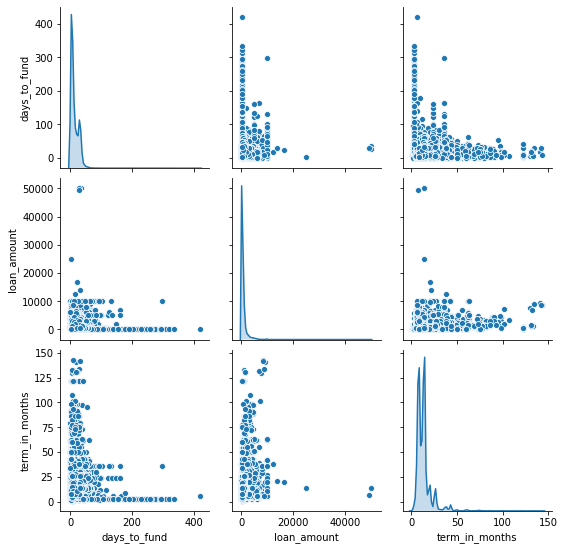

In [53]:
import seaborn as sns
sns.pairplot(kiva_final[["days_to_fund", "loan_amount", "term_in_months"]], diag_kind="kde")


In [54]:
train_stats = train_dataset.describe()
train_stats.pop("days_to_fund")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
funded_amount,40000.0,799.909375,1136.319129,25.0,250.0,475.0,900.0,50000.0
loan_amount,40000.0,799.909375,1136.319129,25.0,250.0,475.0,900.0,50000.0
term_in_months,40000.0,13.383125,8.563587,1.0,8.0,12.0,14.0,143.0
female_borrowers,40000.0,1.648550,3.134705,0.0,1.0,1.0,1.0,48.0
male_borrowers,40000.0,0.383000,1.096034,0.0,0.0,0.0,0.0,39.0
bullet,40000.0,0.096475,0.295245,0.0,0.0,0.0,0.0,1.0
irregular,40000.0,0.400425,0.489991,0.0,0.0,0.0,1.0,1.0
monthly,40000.0,0.502225,0.500001,0.0,0.0,1.0,1.0,1.0
weekly,40000.0,0.000875,0.029568,0.0,0.0,0.0,0.0,1.0
Agriculture,40000.0,0.268800,0.443341,0.0,0.0,0.0,1.0,1.0


In [55]:
train_labels = train_dataset.pop('days_to_fund')
test_labels = test_dataset.pop('days_to_fund')

In [56]:
#  

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [57]:
normed_test_data

,funded_amount,loan_amount,term_in_months,female_borrowers,male_borrowers,bullet,irregular,monthly,weekly,Agriculture,...,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
113274,-0.395936,-0.395936,0.188808,-0.525903,0.562939,-0.326762,-0.817209,0.995547,-0.029593,1.649294,...,-0.03242,-0.510675,-0.119049,-0.224664,-0.101135,-0.24252,-0.471330,-0.263769,-0.152231,-0.030428
553422,-0.175927,-0.175927,0.072035,-0.206893,-0.349442,-0.326762,-0.817209,0.995547,-0.029593,-0.606305,...,-0.03242,-0.510675,-0.119049,-0.224664,-0.101135,-0.24252,2.121602,-0.263769,-0.152231,-0.030428
91433,-0.527941,-0.527941,-0.278286,-0.525903,0.562939,3.060253,-0.817209,-1.004447,-0.029593,1.649294,...,-0.03242,-0.510675,-0.119049,-0.224664,-0.101135,-0.24252,-0.471330,-0.263769,-0.152231,-0.030428
511600,-0.351934,-0.351934,0.188808,-0.206893,-0.349442,-0.326762,-0.817209,0.995547,-0.029593,-0.606305,...,-0.03242,1.958143,-0.119049,-0.224664,-0.101135,-0.24252,-0.471330,-0.263769,-0.152231,-0.030428
635712,-0.329933,-0.329933,0.072035,0.112116,-0.349442,-0.326762,-0.817209,0.995547,-0.029593,1.649294,...,-0.03242,-0.510675,-0.119049,-0.224664,-0.101135,-0.24252,-0.471330,-0.263769,-0.152231,-0.030428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632342,-0.593944,-0.593944,0.072035,-0.206893,-0.349442,-0.326762,-0.817209,0.995547,-0.029593,-0.606305,...,-0.03242,1.958143,-0.119049,-0.224664,-0.101135,-0.24252,-0.471330,-0.263769,-0.152231,-0.030428
176805,1.694146,1.694146,-0.862153,7.449328,-0.349442,-0.326762,1.223646,-1.004447,-0.029593,-0.606305,...,-0.03242,-0.510675,-0.119049,-0.224664,-0.101135,-0.24252,2.121602,-0.263769,-0.152231,-0.030428
649173,-0.417937,-0.417937,-0.395059,-0.206893,-0.349442,-0.326762,1.223646,-1.004447,-0.029593,-0.606305,...,-0.03242,-0.510675,-0.119049,-0.224664,-0.101135,-0.24252,-0.471330,-0.263769,-0.152231,-0.030428
596236,-0.527941,-0.527941,-0.161512,-0.206893,-0.349442,-0.326762,1.223646,-1.004447,-0.029593,1.649294,...,-0.03242,-0.510675,-0.119049,-0.224664,-0.101135,-0.24252,-0.471330,-0.263769,-0.152231,-0.030428


In [58]:
# TODO: plot the error x iterations on the train and validation sets

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [60]:
model = build_model()

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1600      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


In [62]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.09386683],
       [-0.26834503],
       [-0.05361506],
       [ 0.35970318],
       [ 0.09156229],
       [ 0.32175618],
       [ 0.04814667],
       [ 0.11782548],
       [-0.48411283],
       [-0.24341372]], dtype=float32)

In [95]:
# https://www.tensorflow.org/tutorials/keras/regression

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:135.6213,  mae:7.7297,  mse:135.6213,  val_loss:128.9832,  val_mae:8.1224,  val_mse:128.9832,  
....................................................................................................
Epoch: 100, loss:135.7895,  mae:7.7510,  mse:135.7896,  val_loss:127.7390,  val_mae:7.9338,  val_mse:127.7390,  
....................................................................................................
Epoch: 200, loss:136.0894,  mae:7.7522,  mse:136.0893,  val_loss:128.2605,  val_mae:7.8905,  val_mse:128.2605,  
....................................................................................................
Epoch: 300, loss:135.3306,  mae:7.7536,  mse:135.3306,  val_loss:125.2754,  val_mae:7.9781,  val_mse:125.2754,  
....................................................................................................
Epoch: 400, loss:136.3925,  mae:7.7517,  mse:136.3923,  val_loss:129.0400,  val_mae:8.0571,  val_mse:129.0400,  
................................

In [96]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,135.376638,7.738734,135.376617,130.058369,8.180460,130.058380,495
496,135.572871,7.743953,135.572815,129.356472,8.009078,129.356522,496
497,135.933757,7.726767,135.933838,134.285401,8.522965,134.285416,497
498,135.117045,7.714997,135.117065,132.196919,7.952377,132.196915,498
499,136.357103,7.740280,136.357132,128.856092,8.015110,128.856064,499


In [97]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [98]:
history

Text(0, 0.5, 'Days to Fund')

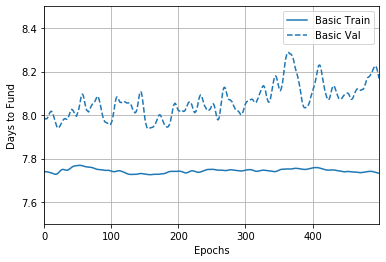

In [99]:
# mean absolute error
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([7.5, 8.5])
plt.ylabel('Days to Fund')

Text(0, 0.5, 'MSE [Days to Fund^2]')

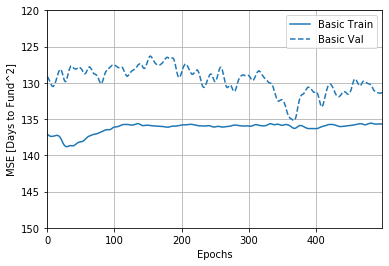

In [100]:
# mean square error
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([150, 120])
plt.ylabel('MSE [Days to Fund^2]')

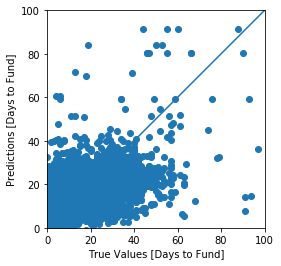

In [104]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Days to Fund]')
plt.ylabel('Predictions [Days to Fund]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

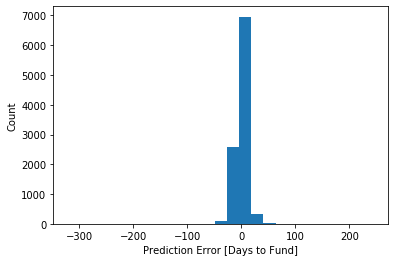

In [105]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Days to Fund]")
_ = plt.ylabel("Count")

## Boosting
* Ada boosting or gradient

## Support Vector Machines

- binaray classification problem
- do parameter tuning via GridSearchCV
- relatively balanced classes

try to predict:
```
class: poisonous=p,edible=e
```

In [286]:
mushroom_df = pd.read_csv('data/mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [287]:
#Frequency distribution of classes
train_outcome = pd.crosstab(index=mushroom_df["class"], columns="count")

train_outcome

col_0,count
class,
e,4208
p,3916


In [309]:
feature_cols = mushroom_df.columns.drop('class')
feature_df = pd.get_dummies(mushroom_df[feature_cols])

In [310]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, mushroom_df['class'], test_size=0.10, random_state=42)

svc_clf = SVC()
svc_clf = svc_clf.fit(X_train, y_train)

In [311]:
y_pred = svc_clf.predict(X_test)

In [312]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=svc_clf.classes_))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       433
           p       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



## k-nearest neighbors

- regression: predict the lender count?
- regression: predict loan amount?
- classification: predict sector?

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [316]:
kiva_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,days_to_fund
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,1.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,1.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,0.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,0.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,0.0


In [318]:
kiva_df.lender_count.describe()

count    622873.000000
mean         21.029425
std          29.087223
min           1.000000
25%           7.000000
50%          13.000000
75%          25.000000
max        2986.000000
Name: lender_count, dtype: float64

In [329]:
kiva_subset

,days_to_fund,funded_amount,loan_amount,term_in_months,repayment_interval,sector,female_borrowers,male_borrowers
0,1.0,300.0,300.0,12.0,irregular,Food,1,0
1,1.0,575.0,575.0,11.0,irregular,Transportation,2,0
2,0.0,150.0,150.0,43.0,bullet,Transportation,1,0
3,0.0,200.0,200.0,11.0,irregular,Arts,1,0
4,0.0,400.0,400.0,14.0,monthly,Food,1,0
...,...,...,...,...,...,...,...,...
671166,1.0,25.0,25.0,13.0,monthly,Agriculture,1,0
671170,0.0,25.0,25.0,13.0,monthly,Agriculture,1,0
671177,2.0,25.0,25.0,13.0,monthly,Agriculture,1,0
671186,0.0,25.0,25.0,13.0,monthly,Agriculture,1,0


In [325]:
#Frequency distribution of classes
train_outcome = pd.crosstab(index=kiva_df["repayment_interval"], columns="count")

train_outcome

col_0,count
repayment_interval,
bullet,60336
irregular,250376
monthly,311559
weekly,602


In [334]:
kiva_target = kiva_subset[['repayment_interval']]
kiva_features = pd.get_dummies(kiva_subset.drop(columns = ['repayment_interval']), prefix='', prefix_sep='')

In [357]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(kiva_features, kiva_target, test_size=0.20, random_state=42)

neigh_clf = KNeighborsClassifier(n_neighbors=15)
neigh_clf.fit(X_train, y_train)

# A = neigh.kneighbors_graph(X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [358]:
A = neigh_clf.kneighbors_graph(X_test) # weighted graph?

KeyboardInterrupt: 

In [359]:
y_pred = neigh_clf.predict(X_test)

In [348]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=neigh_clf.classes_))

              precision    recall  f1-score   support

      bullet       0.66      0.58      0.62     12105
   irregular       0.78      0.81      0.79     50005
     monthly       0.80      0.79      0.80     62350
      weekly       0.61      0.29      0.39       115

    accuracy                           0.78    124575
   macro avg       0.71      0.62      0.65    124575
weighted avg       0.78      0.78      0.78    124575



In [360]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=neigh_clf.classes_))

              precision    recall  f1-score   support

      bullet       0.75      0.49      0.59     12105
   irregular       0.78      0.82      0.80     50005
     monthly       0.80      0.82      0.80     62350
      weekly       0.45      0.15      0.22       115

    accuracy                           0.78    124575
   macro avg       0.69      0.57      0.60    124575
weighted avg       0.78      0.78      0.78    124575



In [351]:
# https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
from sklearn import metrics

k_range = range(3,15)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-v

Text(0, 0.5, 'Testing Accuracy')

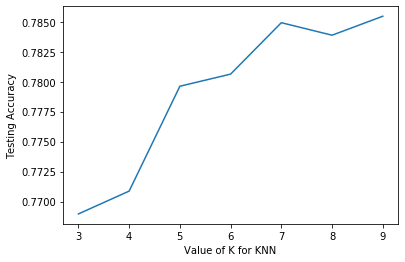

In [355]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [178]:
{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

params_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [180]:
from sklearn.model_selection import GridSearchCV

svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [194]:
svc_model_tuned = svm_model.best_estimator_

In [209]:
svc_model_tuned.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
y_pred = svc_model_tuned.predict(X_test)

NameError: name 'average_precision' is not defined

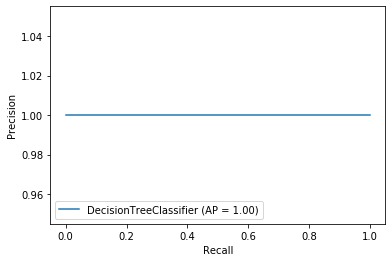

In [207]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [208]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(tree.DecisionTreeClassifier(), 
                                             onehotlabels, 
                                             mushroom_df['class'], 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

ValueError: Invalid parameter n_estimators for estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.